## What is AutoML?

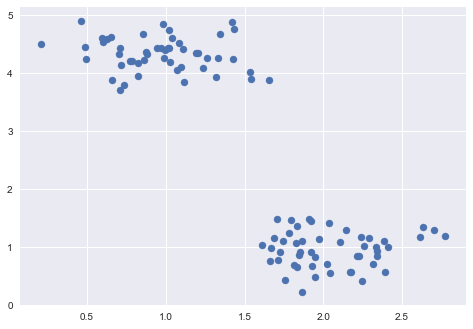

In [1]:
# Sklearn has convenient modules to create sample data.
# make_blobs will help us to create a sample data set suitable for clustering
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=100, centers=2, cluster_std=0.30, random_state=0)

# Let's visualize what we have first
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.scatter(X[:, 0], X[:, 1], s=50)

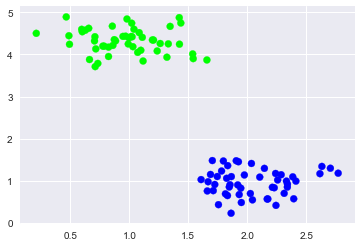

In [2]:
# We will import KMeans model from clustering model family of Sklearn
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=2)
k_means.fit(X)
predictions = k_means.predict(X)

# Let's plot the predictions
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='brg')

In [3]:
k_means.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'n_jobs': 1,
 'precompute_distances': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

## Featuretools

In [4]:
import pandas as pd

# First dataset contains the basic information for databases.
databases_df = pd.DataFrame({"database_id": [2234, 1765, 8796, 2237, 3398],
"creation_date": ["2018-02-01", "2017-03-02", "2017-05-03", "2013-05-12", "2012-05-09"]})

databases_df.head()

,creation_date,database_id
0,2018-02-01,2234
1,2017-03-02,1765
2,2017-05-03,8796
3,2013-05-12,2237
4,2012-05-09,3398


In [5]:
# Second dataset contains the information of transaction for each database id
db_transactions_df = pd.DataFrame({"transaction_id": [26482746, 19384752, 48571125, 78546789, 19998765, 26482646, 12484752, 42471125, 75346789, 16498765, 65487547, 23453847, 56756771, 45645667, 23423498, 12335268, 76435357, 34534711, 45656746, 12312987],
                "database_id": [2234, 1765, 2234, 2237, 1765, 8796, 2237, 8796, 3398, 2237, 3398, 2237, 2234, 8796, 1765, 2234, 2237, 1765, 8796, 2237],
                "transaction_size": [10, 20, 30, 50, 100, 40, 60, 60, 10, 20, 60, 50, 40, 40, 30, 90, 130, 40, 50, 30],
                "transaction_date": ["2018-02-02", "2018-03-02", "2018-03-02", "2018-04-02", "2018-04-02", "2018-05-02", "2018-06-02", "2018-06-02", "2018-07-02", "2018-07-02", "2018-01-03", "2018-02-03", "2018-03-03", "2018-04-03", "2018-04-03", "2018-07-03", "2018-07-03", "2018-07-03", "2018-08-03", "2018-08-03"]})

db_transactions_df.head()

,database_id,transaction_date,transaction_id,transaction_size
0,2234,2018-02-02,26482746,10
1,1765,2018-03-02,19384752,20
2,2234,2018-03-02,48571125,30
3,2237,2018-04-02,78546789,50
4,1765,2018-04-02,19998765,100


In [6]:
# Entities for each of datasets should be defined
entities = {
"databases" : (databases_df, "database_id"),
"transactions" : (db_transactions_df, "transaction_id")
}

# Relationships between tables should also be defined as below
relationships = [("databases", "database_id", "transactions", "database_id")]

print(entities)

{'databases': (  creation_date  database_id
0    2018-02-01         2234
1    2017-03-02         1765
2    2017-05-03         8796
3    2013-05-12         2237
4    2012-05-09         3398, 'database_id'), 'transactions': (    database_id transaction_date  transaction_id  transaction_size
0          2234       2018-02-02        26482746                10
1          1765       2018-03-02        19384752                20
2          2234       2018-03-02        48571125                30
3          2237       2018-04-02        78546789                50
4          1765       2018-04-02        19998765               100
5          8796       2018-05-02        26482646                40
6          2237       2018-06-02        12484752                60
7          8796       2018-06-02        42471125                60
8          3398       2018-07-02        75346789                10
9          2237       2018-07-02        16498765                20
10         3398       2018-01-03        

In [7]:
# There are 2 entities called ‘databases’ and ‘transactions’
# All the pieces that are necessary to engineer features are in place, you can create your feature matrix as below

import featuretools as ft

feature_matrix_db_transactions, feature_defs = ft.dfs(entities=entities, relationships=relationships, target_entity="databases")

feature_defs

[<Feature: SUM(transactions.transaction_size)>,
 <Feature: STD(transactions.transaction_size)>,
 <Feature: MAX(transactions.transaction_size)>,
 <Feature: SKEW(transactions.transaction_size)>,
 <Feature: MIN(transactions.transaction_size)>,
 <Feature: MEAN(transactions.transaction_size)>,
 <Feature: COUNT(transactions)>,
 <Feature: DAY(creation_date)>,
 <Feature: YEAR(creation_date)>,
 <Feature: MONTH(creation_date)>,
 <Feature: WEEKDAY(creation_date)>,
 <Feature: NUM_UNIQUE(transactions.DAY(transaction_date))>,
 <Feature: NUM_UNIQUE(transactions.YEAR(transaction_date))>,
 <Feature: NUM_UNIQUE(transactions.MONTH(transaction_date))>,
 <Feature: NUM_UNIQUE(transactions.WEEKDAY(transaction_date))>,
 <Feature: MODE(transactions.DAY(transaction_date))>,
 <Feature: MODE(transactions.YEAR(transaction_date))>,
 <Feature: MODE(transactions.MONTH(transaction_date))>,
 <Feature: MODE(transactions.WEEKDAY(transaction_date))>]

## Auto-sklearn

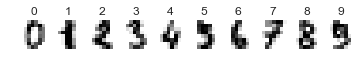

In [8]:
# Necessary imports
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split

# Digits dataset is one of the most popular datasets in machine learning community.
# Every example in this datasets represents a 8x8 image of a digit.
X, y = sklearn.datasets.load_digits(return_X_y=True)

# Let's see the first image. Image is reshaped to 8x8, otherwise it's a vector of size 64.
X[0].reshape(8,8)

# Let's also plot couple of them
import matplotlib.pyplot as plt
%matplotlib inline

number_of_images = 10
images_and_labels = list(zip(X, y))

for i, (image, label) in enumerate(images_and_labels[:number_of_images]):
    plt.subplot(2, number_of_images, i + 1)
    plt.axis('off')
    plt.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

plt.show()

In [9]:
# We split our dataset to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Similarly to creating an estimator in Scikit-learn, we create AutoSklearnClassifier
automl = autosklearn.classification.AutoSklearnClassifier()

# All you need to do is to invoke fit method to start experiment with different feature engineering methods and machine learning models
automl.fit(X_train, y_train)

# Generating predictions is same as Scikit-learn, you need to invoke predict method.
y_hat = automl.predict(X_test)

print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))
# Accuracy score 0.98

Accuracy score 0.9933333333333333


## MLBox

In [10]:
# Necessary Imports
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *
import wget

file_link = 'https://apsportal.ibm.com/exchange-api/v1/entries/8044492073eb964f46597b4be06ff5ea/data?accessKey=9561295fa407698694b1e254d0099600'
file_name = wget.download(file_link)

print(file_name)
# GoSales_Tx_NaiveBayes.csv

/Users/umitcakmak/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


GoSales_Tx_NaiveBayes (1).csv


In [11]:
import pandas as pd
df = pd.read_csv('GoSales_Tx_NaiveBayes.csv')
df.head()

,PRODUCT_LINE,GENDER,AGE,MARITAL_STATUS,PROFESSION
0,Personal Accessories,M,27,Single,Professional
1,Personal Accessories,F,39,Married,Other
2,Mountaineering Equipment,F,39,Married,Other
3,Personal Accessories,F,56,Unspecified,Hospitality
4,Golf Equipment,M,45,Married,Retired


In [ ]:
test_df = df.drop(['PRODUCT_LINE'], axis = 1)

# First 300 records saved as test datased
test_df[:300].to_csv('test_data.csv')

paths = ["GoSales_Tx_NaiveBayes.csv", "test_data.csv"]
target_name = "PRODUCT_LINE"

rd = Reader(sep = ',')
df = rd.train_test_split(paths, target_name)

dft = Drift_thresholder()
df = dft.fit_transform(df)

opt = Optimiser(scoring = 'accuracy', n_folds = 3)
opt.evaluate(None, df)

space = {
        'ne__numerical_strategy':{"search":"choice", "space":[0]},
        'ce__strategy':{"search":"choice",
               "space":["label_encoding","random_projection", "entity_embedding"]},
        'fs__threshold':{"search":"uniform", "space":[0.01,0.3]},
        'est__max_depth':{"search":"choice", "space":[3,4,5,6,7]}
        }

best = opt.optimise(space, df,15)

predictor = Predictor()
predictor.fit_predict(best, df)

## TPOT

In [12]:
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Digits dataset that you have used in Auto-sklearn example
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    train_size=0.75, test_size=0.25)

# You will create your TPOT classifier with commonly used arguments
tpot = TPOTClassifier(generations=10, population_size=30, verbosity=2)

# When you invoke fit method, TPOT will create generations of populations, seeking best set of parameters. Arguments you have used to create TPOTClassifier such as generaions and population_size will affect the search space and resulting pipeline.
tpot.fit(X_train, y_train)

print(tpot.score(X_test, y_test))
# 0.9834

Version 0.8.3 of tpot is outdated. Version 0.9.3 was released 3 days ago.


Optimization Progress:  17%|█▋        | 57/330 [02:32<10:19,  2.27s/pipeline] 

Generation 1 - Current best internal CV score: 0.9873759768128435


Optimization Progress:  25%|██▌       | 84/330 [04:06<12:03,  2.94s/pipeline]

Generation 2 - Current best internal CV score: 0.9873759768128435


Optimization Progress:  33%|███▎      | 110/330 [05:43<10:56,  2.98s/pipeline]

Generation 3 - Current best internal CV score: 0.9873759768128435


Optimization Progress:  42%|████▏     | 138/330 [06:48<06:43,  2.10s/pipeline]

Generation 4 - Current best internal CV score: 0.9881194712366353


Optimization Progress:  51%|█████     | 168/330 [08:44<09:58,  3.69s/pipeline]

Generation 5 - Current best internal CV score: 0.9881194712366353


Optimization Progress:  60%|█████▉    | 197/330 [11:59<12:55,  5.83s/pipeline]

Generation 6 - Current best internal CV score: 0.9881194712366353


Optimization Progress:  69%|██████▉   | 227/330 [13:22<05:01,  2.93s/pipeline]

Generation 7 - Current best internal CV score: 0.9881194712366353


Optimization Progress:  77%|███████▋  | 254/330 [14:14<02:08,  1.69s/pipeline]

Generation 8 - Current best internal CV score: 0.9881194712366353


Optimization Progress:  85%|████████▌ | 281/330 [14:48<01:16,  1.56s/pipeline]

Generation 9 - Current best internal CV score: 0.9888685349070473


Generation 10 - Current best internal CV score: 0.9888685349070473

Best pipeline: KNeighborsClassifier(DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=6, DecisionTreeClassifier__min_samples_leaf=2, DecisionTreeClassifier__min_samples_split=2), KNeighborsClassifier__n_neighbors=2, KNeighborsClassifier__p=DEFAULT, KNeighborsClassifier__weights=distance)
0.9844444444444445


In [13]:
tpot.export('my_pipeline.py')

In [14]:
!cat my_pipeline.py

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, make_union
from sklearn.tree import DecisionTreeClassifier
from tpot.builtins import StackingEstimator

# NOTE: Make sure that the class is labeled 'class' in the data file
tpot_data = np.recfromcsv('PATH/TO/DATA/FILE', delimiter='COLUMN_SEPARATOR', dtype=np.float64)
features = np.delete(tpot_data.view(np.float64).reshape(tpot_data.size, -1), tpot_data.dtype.names.index('class'), axis=1)
training_features, testing_features, training_target, testing_target = \
    train_test_split(features, tpot_data['class'], random_state=42)

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=DecisionTreeClassifier(criterion="entropy", max_depth=6, min_samples_leaf=2, min_samples_split=2)),
    KNeighborsClassifier(n_neighbors=2, weights="distance")
)

exported_pipeline.fit(training_features, training_target)
results = e

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=DecisionTreeClassifier(criterion="entropy", max_depth=6, min_samples_leaf=2, min_samples_split=2)),
    KNeighborsClassifier(n_neighbors=2, weights="distance")
)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)